In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier

In [568]:
df = pd.read_csv('data_2_label1706.csv', index_col=[0])

In [569]:
df.head()

,Olus tarihi,Enlem,Boylam,Der(km),Mag,FayHatti
0,2023-03-31,36.9908,36.5998,B,2.0,A
2,2023-03-30,38.1638,37.9107,A,1.0,A
3,2023-03-30,38.3488,38.2048,A,1.0,A
4,2023-03-29,37.9415,36.3198,A,1.0,A
5,2023-03-29,38.2020,38.0810,B,2.0,A


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8676 entries, 0 to 12340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Olus tarihi  8676 non-null   object 
 1   Enlem        8676 non-null   float64
 2   Boylam       8676 non-null   float64
 3   Der(km)      8676 non-null   object 
 4   Mag          8676 non-null   float64
 5   FayHatti     8676 non-null   object 
dtypes: float64(3), object(3)
memory usage: 474.5+ KB


In [571]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# LabelEncoder nesnesini oluşturma
label_encoder = LabelEncoder()

# Kodlanacak sütunları belirtin
columns_to_encode = ['Der(km)', 'Mag', 'FayHatti']

# Her bir sütunu dönerek LabelEncoder ile kodlama yapma
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


In [572]:
import plotly.express as px
fig = px.pie(df['Mag'], values=df['Mag'].value_counts())
fig.show()

In [573]:
df.head(4)

,Olus tarihi,Enlem,Boylam,Der(km),Mag,FayHatti
0,2023-03-31,36.9908,36.5998,1,1,0
2,2023-03-30,38.1638,37.9107,0,0,0
3,2023-03-30,38.3488,38.2048,0,0,0
4,2023-03-29,37.9415,36.3198,0,0,0


In [574]:
df = df.sort_values(by=['Olus tarihi'],ascending=False)

In [575]:
df.reset_index(drop=True, inplace=True)

In [576]:
df.head(3)

,Olus tarihi,Enlem,Boylam,Der(km),Mag,FayHatti
0,2023-03-31,36.9908,36.5998,1,1,0
1,2023-03-30,38.3488,38.2048,0,0,0
2,2023-03-30,38.1638,37.9107,0,0,0


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Olus tarihi  8676 non-null   object 
 1   Enlem        8676 non-null   float64
 2   Boylam       8676 non-null   float64
 3   Der(km)      8676 non-null   int32  
 4   Mag          8676 non-null   int32  
 5   FayHatti     8676 non-null   int32  
dtypes: float64(2), int32(3), object(1)
memory usage: 305.1+ KB


### Data Temizleme

In [578]:
df["FayHatti"].value_counts()

2    3265
0    2893
3    1244
1    1070
4     150
5      54
Name: FayHatti, dtype: int64

In [579]:
df.columns = df.columns.str.replace('Mag', 'Siddet')

In [580]:
df.drop("Enlem" , axis=1 , inplace=True)
df.drop("Boylam" , axis=1 , inplace=True)

In [581]:
df.head(5)

,Olus tarihi,Der(km),Siddet,FayHatti
0,2023-03-31,1,1,0
1,2023-03-30,0,0,0
2,2023-03-30,0,0,0
3,2023-03-29,0,0,0
4,2023-03-29,0,0,0


#### Zaman Serileri Kavramından dolayı Datayı Manuel olarak Train Test Split Yapma

In [582]:
df_test = df[df["Olus tarihi"] > "2020"] #2021+2022+2023

In [583]:
df_test.tail()

,Olus tarihi,Der(km),Siddet,FayHatti
2587,2020-01-22,0,0,2
2588,2020-01-11,1,1,1
2589,2020-01-09,0,0,2
2590,2020-01-07,0,0,1
2591,2020-01-04,2,1,2


In [584]:
X_test = df_test.drop(["Siddet" , 'Olus tarihi'] , axis=1)
y_test = df_test["Siddet"]

In [585]:
df_train = df[df['Olus tarihi'] < "2020"]

In [586]:
df_train.head()

,Olus tarihi,Der(km),Siddet,FayHatti
2592,2019-12-29,0,1,1
2593,2019-12-27,0,0,0
2594,2019-12-27,0,2,0
2595,2019-12-26,1,0,2
2596,2019-12-26,1,0,2


In [587]:
X_train = df_train.drop(["Siddet" , 'Olus tarihi'] , axis=1)
y_train = df_train["Siddet"]

In [588]:
df.drop('Olus tarihi' , axis=1 , inplace=True)

In [589]:
X_train.head()

,Der(km),FayHatti
2592,0,1
2593,0,0
2594,0,0
2595,1,2
2596,1,2


In [590]:
y_train.reset_index(drop=True, inplace=True)
y_test.value_counts()

0    1605
1     887
2      91
3       7
4       2
Name: Siddet, dtype: int64

In [591]:
X_test.reset_index(drop=True, inplace=True)
X_test.head(2)

,Der(km),FayHatti
0,1,0
1,0,0


In [592]:
X_train.reset_index(drop=True, inplace=True)
X_train.head(2)

,Der(km),FayHatti
0,0,1
1,0,0


In [593]:
y_test.reset_index(drop=True, inplace=True)
y_test

0       1
1       0
2       0
3       0
4       0
       ..
2587    0
2588    1
2589    0
2590    0
2591    1
Name: Siddet, Length: 2592, dtype: int32

## OVERSAMPLING YAPMADAN MODELLEME VE METRİK ÖLÇÜMÜ

* İmbalanced datasetlerde karar ağaçları kullanmak daha mantıklıdır.
     * kfold gibi cross validation kullanarak datamıza etkisini gözlemleyeceğiz.

In [594]:
def myroccurve(modelek ,X_train , y_train , X_test,y_test):
    from sklearn.metrics import roc_curve, auc
    class_probabilities = modelek.predict_proba(X_test)
    preds = class_probabilities[:, 1]

    fpr1, tpr1, threshold1 = roc_curve(y_test, preds,pos_label=1)
    fpr2, tpr2, threshold2 = roc_curve(y_test, preds,pos_label=2)
    fpr3, tpr3, threshold3 = roc_curve(y_test, preds,pos_label=3)
    fpr4, tpr4, threshold4 = roc_curve(y_test, preds,pos_label=4)
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    roc_auc3 = auc(fpr3, tpr3)
    roc_auc4 = auc(fpr4, tpr4)

    # Printing AUC
    print(f"AUC for 1 is: {roc_auc1}")
    print(f"AUC for 2 is: {roc_auc2}")
    print(f"AUC for 3 is: {roc_auc3}")
    print(f"AUC for 4 is: {roc_auc4}")
    
    # Plotting the ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
    plt.plot(fpr3, tpr3, 'r', label = 'AUC = %0.2f' % roc_auc3)
    plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    gmeans1 = np.sqrt(tpr1 * (1-fpr1))
    ix1 = np.argmax(gmeans1)
    print('Best Threshold1=%f, G-Mean=%.3f' % (threshold1[ix1], gmeans1[ix1]))
    plt.scatter(fpr1[ix1], tpr1[ix1], marker='o', color='black', label='Best')
    gmeans2 = np.sqrt(tpr2 * (1-fpr2))
    ix2 = np.argmax(gmeans2)
    print('Best Threshold2=%f, G-Mean=%.3f' % (threshold2[ix2], gmeans2[ix2]))
    plt.scatter(fpr2[ix2], tpr2[ix2], marker='o', color='black', label='Best')
    gmeans3 = np.sqrt(tpr3 * (1-fpr3))
    ix3 = np.argmax(gmeans3)
    print('Best Threshold3=%f, G-Mean=%.3f' % (threshold3[ix3], gmeans3[ix3]))
    plt.scatter(fpr3[ix3], tpr3[ix3], marker='o', color='black', label='Best')
    gmeans4 = np.sqrt(tpr4 * (1-fpr4))
    ix4 = np.argmax(gmeans4)
    print('Best Threshold4=%f, G-Mean=%.3f' % (threshold4[ix4], gmeans4[ix4]))
    plt.scatter(fpr4[ix4], tpr4[ix4], marker='o', color='black', label='Best')
    plt.show()

### DECISION TREE

In [637]:
# Kategorik sütunları one-hot encoding ile dönüştürme
# DecisionTreeClassifier ile GridSearchCV'yi kullanma
model2 = DecisionTreeClassifier()
params = {
    'max_depth': [2, 3, 5, 10, 20,30,40,50,60,70,80,90,100],
    'min_samples_leaf': [5, 10, 20, 50, 100,120,140,160,180,200],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=model2, 
                           param_grid=params, 
                           cv=50, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 50 folds for each of 260 candidates, totalling 13000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                       90, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 120, 140, 160,
                                              180, 200]},
             scoring='accuracy', verbose=1)

In [639]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004411,0.001336,0.002506,0.000764,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.696721,0.696721,...,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.698892,0.00293,1
1,0.003831,0.000689,0.002526,0.000543,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.696721,0.696721,...,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.698892,0.00293,1
2,0.004355,0.002393,0.002762,0.002269,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.696721,0.696721,...,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.698892,0.00293,1
3,0.004426,0.002613,0.002684,0.001653,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.696721,0.696721,...,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.698892,0.00293,1
4,0.004123,0.000962,0.002592,0.001101,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.696721,0.696721,...,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.702479,0.698892,0.00293,1


In [640]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}

In [680]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=20 , criterion='entropy' , min_samples_leaf=20)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20)

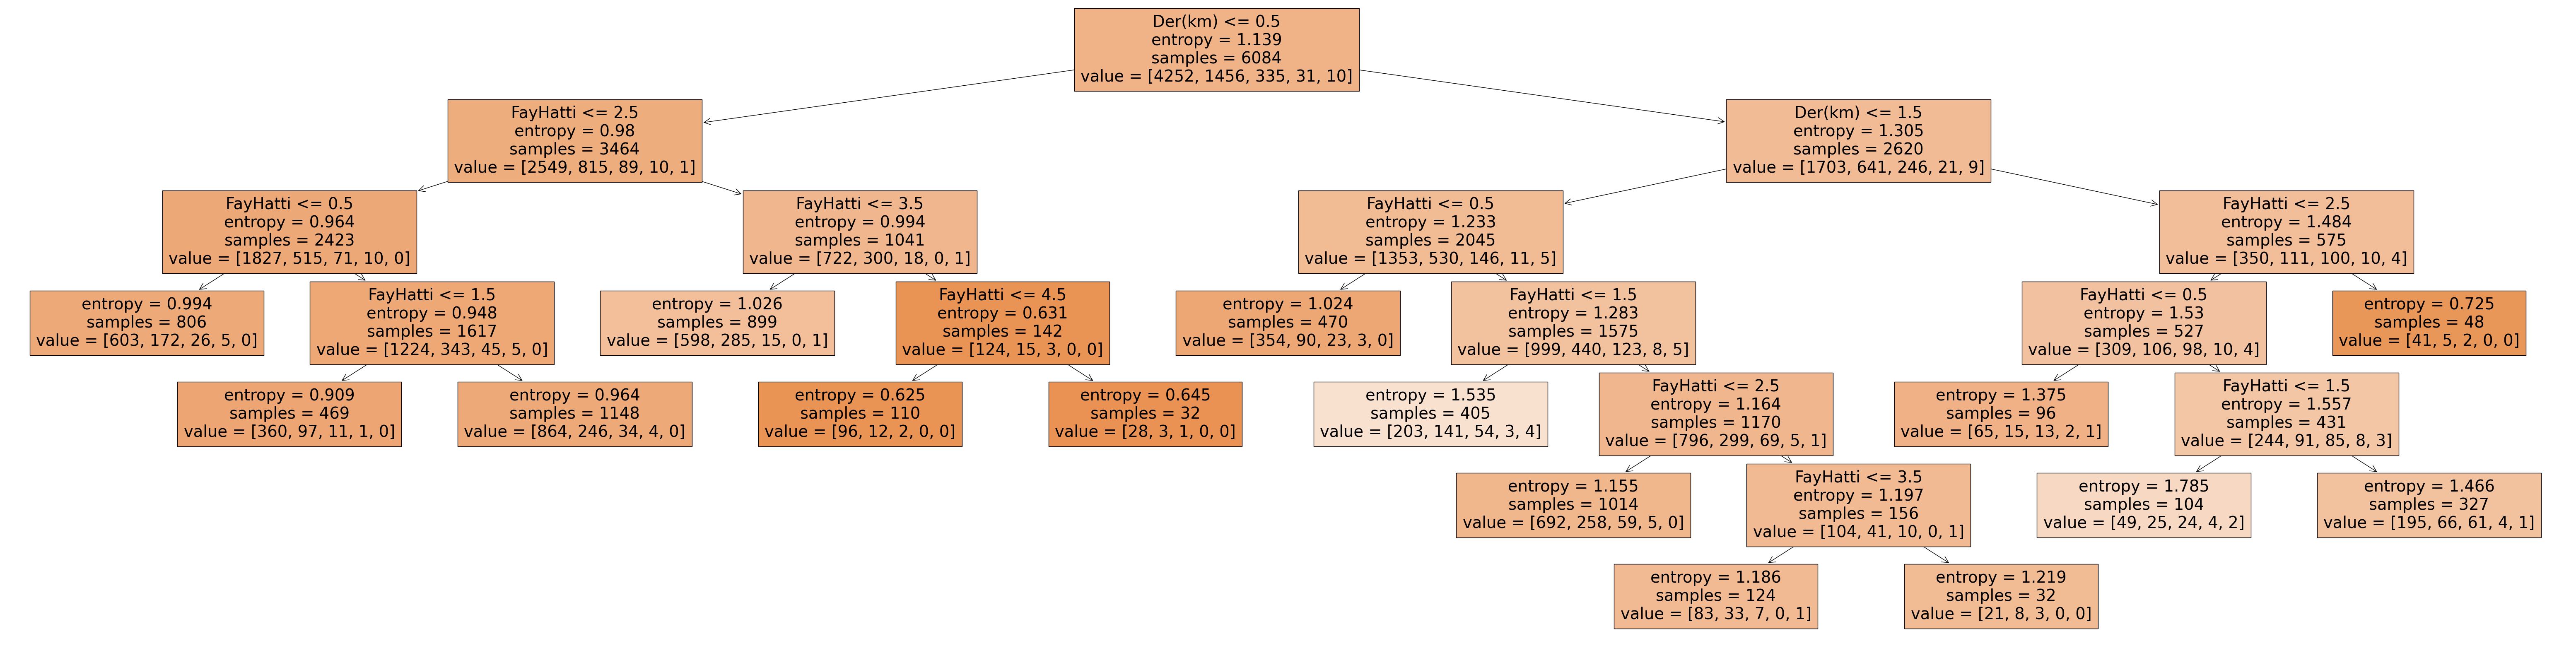

In [681]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model2, feature_names=X_train.columns, filled=True);

In [682]:
model2.tree_.max_depth

6

In [683]:
predtrain = model2.predict(X_train)
predtest = model2.predict(X_test)
print('Accuracy Train:',accuracy_score(y_train,predtrain))
print('Accuracy  Test:' ,accuracy_score(y_test,predtest))

Accuracy Train: 0.6988823142669297
Accuracy  Test: 0.6192129629629629


AUC for 1 is: 0.46853871662032553
AUC for 2 is: 0.46926943508310964
AUC for 3 is: 0.5752417794970986
AUC for 4 is: 0.3974903474903475
Best Threshold1=0.214286, G-Mean=0.440
Best Threshold2=0.254438, G-Mean=0.448
Best Threshold3=0.254438, G-Mean=0.582
Best Threshold4=0.213400, G-Mean=0.398


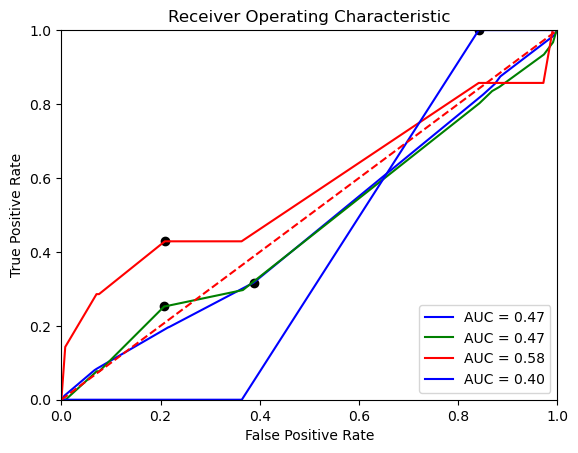

In [684]:
myroccurve(model2,X_train,y_train,X_test,y_test)

In [686]:
print("classification report when threshold is default (0.5)")
print(classification_report(y_test, model2.predict(X_test)))
new_threshold = 0.096942
print("classification report when threshold is changed to ",new_threshold)
y_pred = (model2.predict_proba(X_test)[:,1] >= new_threshold).astype(bool) 
print(classification_report(y_test,y_pred))

classification report when threshold is default (0.5)
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.62      2592
   macro avg       0.12      0.20      0.15      2592
weighted avg       0.38      0.62      0.47      2592

classification report when threshold is changed to  0.096942
              precision    recall  f1-score   support

           0       0.67      0.00      0.00      1605
           1       0.34      1.00      0.51       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.34      2592
   macro avg    

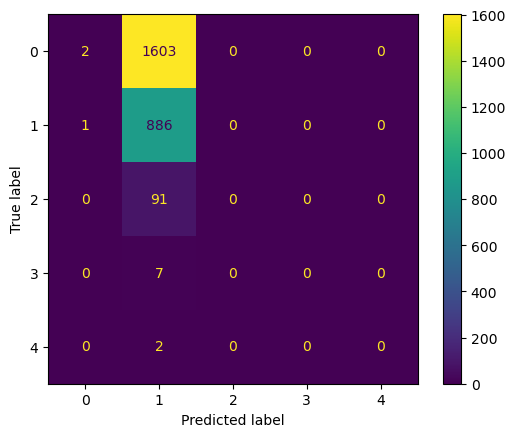

In [687]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

### RANDOM FOREST

In [699]:
model = RandomForestClassifier(random_state=25, n_jobs=-1, n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=25)

In [700]:
predtrain = model2.predict(X_train)
predtest = model2.predict(X_test)
print('Accuracy Train:',accuracy_score(y_train,predtrain))
print('Accuracy  Test:' ,accuracy_score(y_test,predtest))

Accuracy Train: 0.6988823142669297
Accuracy  Test: 0.6192129629629629


AUC for 1 is: 0.46854599014107323
AUC for 2 is: 0.4692562535425391
AUC for 3 is: 0.5752417794970986
AUC for 4 is: 0.3974903474903475
Best Threshold1=0.217681, G-Mean=0.440
Best Threshold2=0.251229, G-Mean=0.448
Best Threshold3=0.251229, G-Mean=0.582
Best Threshold4=0.214929, G-Mean=0.398


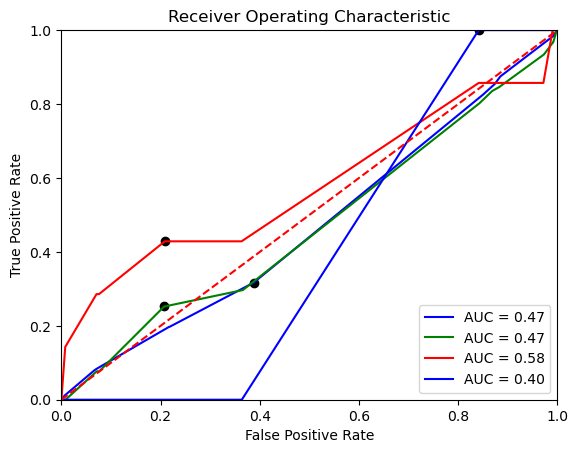

In [701]:
myroccurve(model,X_train,y_train,X_test,y_test)

In [702]:
print("classification report when threshold is default (0.5)")
print(classification_report(y_test, model.predict(X_test)))
new_threshold=0.121448
print("classification report when threshold is changed to ",new_threshold)
y_pred = (model.predict_proba(X_test)[:,1] >= new_threshold).astype(bool) 
print(classification_report(y_test,y_pred))

classification report when threshold is default (0.5)
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.62      2592
   macro avg       0.12      0.20      0.15      2592
weighted avg       0.38      0.62      0.47      2592

classification report when threshold is changed to  0.121448
              precision    recall  f1-score   support

           0       0.36      0.01      0.01      1605
           1       0.34      0.99      0.51       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.34      2592
   macro avg    

### XGBOOST

In [703]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [704]:
classifier=xgboost.XGBClassifier()

In [705]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [706]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [707]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [246]:
import xgboost

xgboost.set_config(verbosity=0)

In [735]:
xgboostClassifier=xgboost.XGBClassifier(
              colsample_bytree=0.5, 
              gamma=0.02, learning_rate=0.001,
              min_child_weight=10, 
              n_estimators=100, 
              objective='multi:softprob')

In [736]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgboostClassifier,X_train,y_train,cv=10)

In [737]:
score.mean()

0.69888298332037

In [738]:
xgboostClassifier.fit(X_train,y_train)
y_pred = model.predict(X_test)

AUC for 1 is: 0.4758248007220623
AUC for 2 is: 0.4821478002205711
AUC for 3 is: 0.520254213871235
AUC for 4 is: 0.28166023166023163
Best Threshold1=0.201706, G-Mean=0.468
Best Threshold2=0.201957, G-Mean=0.503
Best Threshold3=0.202677, G-Mean=0.573
Best Threshold4=0.200985, G-Mean=0.207


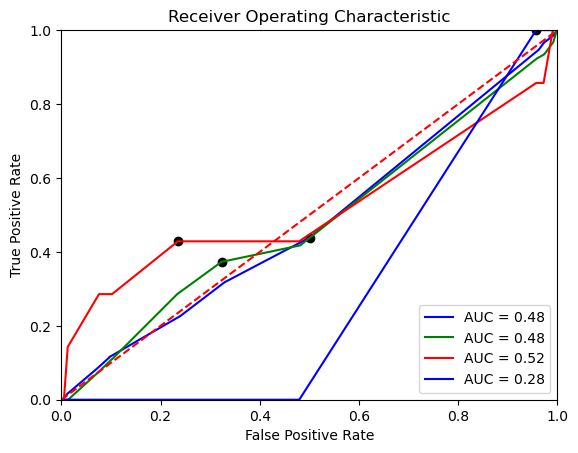

In [739]:
myroccurve(xgboostClassifier,X_train,y_train,X_test,y_test)

In [740]:
print("classification report when threshold is default (0.5)")
print(classification_report(y_test, xgboostClassifier.predict(X_test)))
new_threshold=0.118172
print("classification report when threshold is changed to ",new_threshold)
y_pred = (xgboostClassifier.predict_proba(X_test)[:,1] >= new_threshold).astype(bool) 
print(classification_report(y_test,y_pred))

classification report when threshold is default (0.5)
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.62      2592
   macro avg       0.12      0.20      0.15      2592
weighted avg       0.38      0.62      0.47      2592

classification report when threshold is changed to  0.118172
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1605
           1       0.34      1.00      0.51       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.34      2592
   macro avg    

In [741]:
def Dummy(strategy, ax=None, constant=0, showReport=False):
  # no skill model, stratified random class predictions
    model = DummyClassifier(strategy=strategy, constant=constant)
    model.fit(X_train, y_train)
    class_probabilities = model.predict_proba(X_test)
    preds = class_probabilities[:, 1]


    label='DummyClassifier ('+str(strategy)+')'
    if (strategy=='constant'):    
        label=label+' '+str(constant)
  
    print(label)
    if showReport:
        print(classification_report(y_test, model.predict(X_test)))
    else:
        print("accuracy_score {:.2f}%".format(100*accuracy_score(y_test, model.predict(X_test))))
  
    fpr1, tpr1, threshold = roc_curve(y_test, preds,pos_label=1)
    fpr2, tpr2, threshold = roc_curve(y_test, preds,pos_label=2)
    fpr3, tpr3, threshold = roc_curve(y_test, preds,pos_label=3)
    fpr4, tpr4, threshold = roc_curve(y_test, preds,pos_label=4)
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    roc_auc3 = auc(fpr3, tpr3)
    roc_auc4 = auc(fpr4, tpr4)

# Printing AUC
    print(f"AUC for 1 is: {roc_auc1}")
    print(f"AUC for 2 is: {roc_auc2}")
    print(f"AUC for 3 is: {roc_auc3}")
    print(f"AUC for 4 is: {roc_auc4}")
    if ax is not None:
    # retrieve just the probabilities for the positive class
    #print("testy, pos_probs: ", testy, pos_probs)

        plt.title('Receiver Operating Characteristic')
        ax.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
        ax.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
        ax.plot(fpr3, tpr3, 'r', label = 'AUC = %0.2f' % roc_auc3)
        ax.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
        ax.set_title('{} ROC AUC {:.3f}'.format(label, (roc_auc1+roc_auc2+roc_auc3+roc_auc4)/4))
    # axis labels
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
    # show the legend
        ax.legend()
    return ax

In [742]:
def SkilFul(model, ax=None,   showReport= False, return_tresholds = False):
  # skilled model
  label=str(model)[:15]
  print("A skilled model: "+ label)
  model = model
  model.fit(X_train, y_train)
  class_probabilities = model.predict_proba(X_test)
  preds = class_probabilities[:, 1]

  if showReport:
    print(classification_report(y_test, model.predict(X_test)))
  else:
    print("accuracy_score {:.2f}%".format(100*accuracy_score(y_test, model.predict(X_test))))


  fpr1, tpr1, threshold = roc_curve(y_test, preds,pos_label=1)
  fpr2, tpr2, threshold = roc_curve(y_test, preds,pos_label=2)
  fpr3, tpr3, threshold = roc_curve(y_test, preds,pos_label=3)
  fpr4, tpr4, threshold = roc_curve(y_test, preds,pos_label=4)
  roc_auc1 = auc(fpr1, tpr1)
  roc_auc2 = auc(fpr2, tpr2)
  roc_auc3 = auc(fpr3, tpr3)
  roc_auc4 = auc(fpr4, tpr4)

# Printing AUC
  print(f"AUC for 1 is: {roc_auc1}")
  print(f"AUC for 2 is: {roc_auc2}")
  print(f"AUC for 3 is: {roc_auc3}")
  print(f"AUC for 4 is: {roc_auc4}")

# Plotting the ROC

  if ax is not None:
    
    # plot model roc curve
    plt.title('Receiver Operating Characteristic')
    ax.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
    ax.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
    ax.plot(fpr3, tpr3, 'r', label = 'AUC = %0.2f' % roc_auc3)
    ax.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
    ax.set_title('{} ROC AUC {:.3f}'.format(label, (roc_auc1+roc_auc2+roc_auc3+roc_auc4)/4))
    
    # axis labels
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    # show the legend
    ax.legend()
  if return_tresholds:
    return ax,fpr, tpr, threshold
  else:
    return ax

In [743]:
Dummy('stratified')
Dummy('most_frequent')
Dummy('prior')
Dummy('uniform')
Dummy('constant', constant=0)
Dummy('constant', constant=1)
SkilFul(model=LogisticRegression())
SkilFul(model=KNeighborsClassifier())
SkilFul(model=GaussianNB())

DummyClassifier (stratified)
accuracy_score 51.66%
AUC for 1 is: 0.5027884033630116
AUC for 2 is: 0.48054843996467345
AUC for 3 is: 0.5968775904946118
AUC for 4 is: 0.38223938223938225
DummyClassifier (most_frequent)
accuracy_score 61.92%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
DummyClassifier (prior)
accuracy_score 61.92%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
DummyClassifier (uniform)
accuracy_score 19.83%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
DummyClassifier (constant) 0
accuracy_score 61.92%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
DummyClassifier (constant) 1
accuracy_score 34.22%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
A skilled model: LogisticRegress
accuracy_score 61.92%
AUC for 1 is: 0.4761236763018775
AUC for 2 is: 0.49351907588612903
AUC for 3 is: 0.4612323846366399
AUC for 4 is: 0.25926640926640926
A skilled model:

In [744]:
Dummy('stratified',  showReport= True)
Dummy('most_frequent',  showReport= True)
Dummy('prior',  showReport= True)
Dummy('uniform',  showReport= True)
Dummy('constant',  constant=0, showReport= True)
Dummy('constant',  constant=1, showReport= True)
SkilFul(model=LogisticRegression(), showReport= True)
SkilFul(model=KNeighborsClassifier(), showReport= True)
SkilFul(model=GaussianNB(), showReport= True)

DummyClassifier (stratified)
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1605
           1       0.36      0.25      0.30       887
           2       0.02      0.03      0.03        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.52      2592
   macro avg       0.20      0.20      0.20      2592
weighted avg       0.51      0.52      0.51      2592

AUC for 1 is: 0.505180069230693
AUC for 2 is: 0.4662640438330163
AUC for 3 is: 0.5279635258358663
AUC for 4 is: 0.38494208494208493
DummyClassifier (most_frequent)
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00    

* stratified    --------------------

DummyClassifier (stratified)
accuracy_score 51.43%
AUC for 1 is: 0.5028535344351615
AUC for 2 is: 0.49183403561652267
AUC for 3 is: 0.5196463111356728
AUC for 4 is: 0.37664092664092663
DummyClassifier (most_frequent)
accuracy_score 61.92%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
DummyClassifier (prior)
accuracy_score 61.92%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
DummyClassifier (uniform)
accuracy_score 20.45%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
DummyClassifier (constant) 0
accuracy_score 61.92%
AUC for 1 is: 0.5
AUC for 2 is: 0.5
AUC for 3 is: 0.5
AUC for 4 is: 0.5
A skilled model: LogisticRegress
accuracy_score 61.92%
AUC for 1 is: 0.4761236763018775
AUC for 2 is: 0.49351907588612903
AUC for 3 is: 0.4612323846366399
AUC for 4 is: 0.25926640926640926
A skilled model: KNeighborsClass
accuracy_score 61.73%
AUC for 1 is: 0.5345981545094176
AUC for 2 is: 0.5346103316914993
AUC for 3 is: 0.43

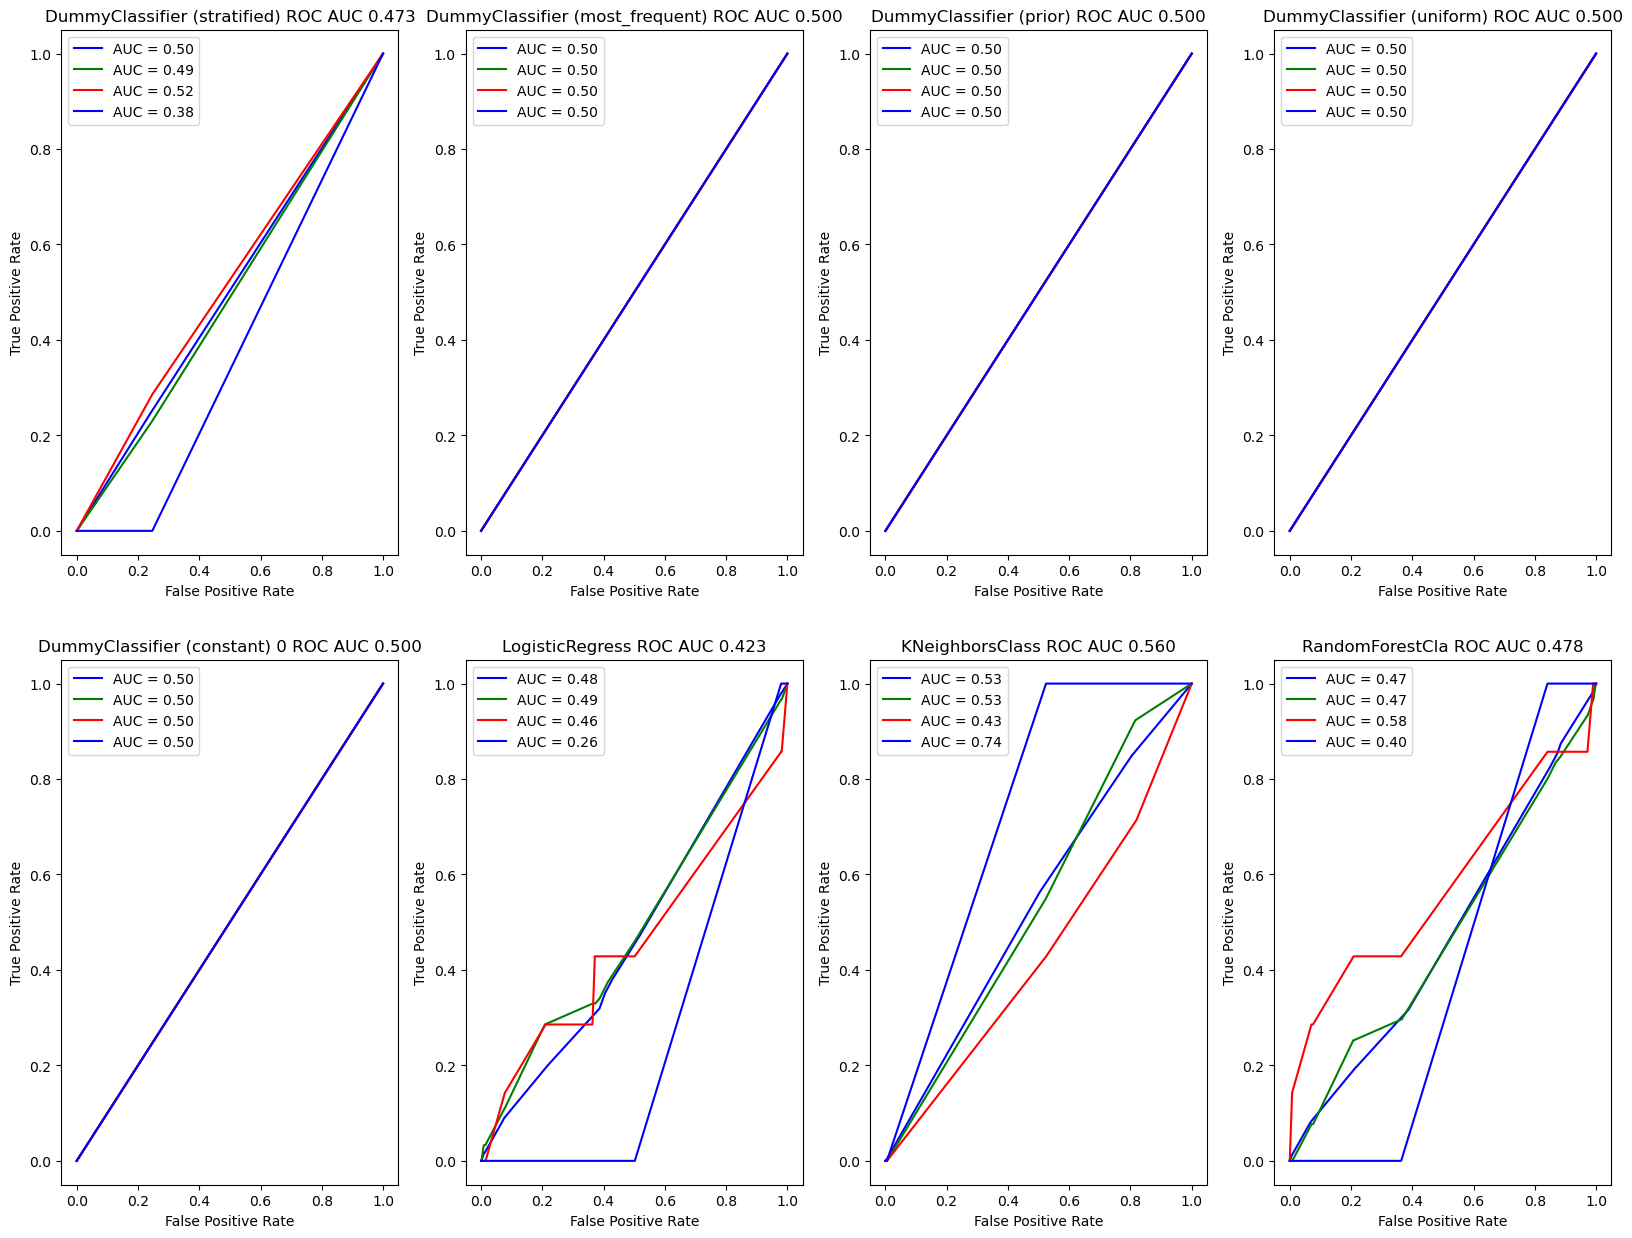

In [745]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))
Dummy('stratified', axes[0][0])
Dummy('most_frequent', axes[0][1])
Dummy('prior', axes[0][2])
Dummy('uniform', axes[0][3])
Dummy('constant', axes[1][0], constant=0)
SkilFul(model=LogisticRegression(),ax=axes[1][1])
SkilFul(model=KNeighborsClassifier(),ax=axes[1][2])
SkilFul(model=RandomForestClassifier(),ax=axes[1][3])

plt.show()

### OVERSAMPLING SONRASI MODELLEME VE METRİK ÖLÇÜMÜ

| SAMPLING OVER TRAIN DATA | SAMPLING UNDER TRAIN DATA | SAMPLING UNDER TEST DATA | 
| --- | --- | --- |
| randomTrainx , randomTrainy | underX, undery |testunderX, testundery |
| SmoteTrainx, smoteTrainy |  |  |
| allTrainx, allTrainy |  |  |
| minoritytrainx, minorityTrainy |  |  |
| adasynTrainx, adasynTrainy |  | |
| adasynTrainx, adasynTrainy |  | |
| tomekTrainx, tomekTrainy |  | |

| SAMPLING OVER TEST DATA |
| --- |
| minorityTestx, minorityTesty | 
| notminTestx, notminTesty| 
| allTestx, allTesty | 


#### 1.RandomOverSampler

In [746]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=42)
randomTrainx , randomTrainy = os.fit_resample(X_train, y_train)

In [747]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(randomTrainx.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(randomTrainy.shape))

Before OverSampling, the shape of train_X: (6084, 2)
Before OverSampling, the shape of train_y: (6084,) 

After OverSampling, the shape of train_X: (21260, 2)
After OverSampling, the shape of train_y: (21260,) 



In [748]:
unique_values = np.unique(randomTrainy)
print(unique_values)

[0 1 2 3 4]


#### 2.Oversampling SMOTE + not majority

In [749]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smoteTrainx, smoteTrainy = smote.fit_resample(X_train, y_train)

In [750]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(smoteTrainx.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(smoteTrainy.shape))

Before OverSampling, the shape of train_X: (6084, 2)
Before OverSampling, the shape of train_y: (6084,) 

After OverSampling, the shape of train_X: (21260, 2)
After OverSampling, the shape of train_y: (21260,) 



In [751]:
unique_values2 = np.unique(smoteTrainy)
print(unique_values2)

[0 1 2 3 4]


#### 3.Oversampling SMOTE + all

In [752]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='all')
allTrainx, allTrainy = smote.fit_resample(X_train, y_train)

In [753]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(allTrainx.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(allTrainy.shape))

Before OverSampling, the shape of train_X: (6084, 2)
Before OverSampling, the shape of train_y: (6084,) 

After OverSampling, the shape of train_X: (21260, 2)
After OverSampling, the shape of train_y: (21260,) 



In [754]:
unique_values3 = np.unique(allTrainy)
print(unique_values3)

[0 1 2 3 4]


#### 4.Oversampling SMOTE + minority

In [755]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
minoritytrainx, minorityTrainy = smote.fit_resample(X_train, y_train)

In [756]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(minoritytrainx.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(minorityTrainy.shape))

Before OverSampling, the shape of train_X: (6084, 2)
Before OverSampling, the shape of train_y: (6084,) 

After OverSampling, the shape of train_X: (10326, 2)
After OverSampling, the shape of train_y: (10326,) 



In [757]:
unique_values4 = np.unique(minorityTrainy)
print(unique_values4)

[0 1 2 3 4]


#### 5.Oversampling ADASYN

In [758]:
from imblearn.over_sampling import  ADASYN
adasynTrainx, adasynTrainy = ADASYN().fit_resample(X_train, y_train)

In [759]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(adasynTrainy.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(adasynTrainx.shape))

Before OverSampling, the shape of train_X: (6084, 2)
Before OverSampling, the shape of train_y: (6084,) 

After OverSampling, the shape of train_X: (21030,)
After OverSampling, the shape of train_y: (21030, 2) 



In [760]:
unique_values4 = np.unique(adasynTrainy)
print(unique_values4)

[0 1 2 3 4]


### BlendedSampling (Train Data)

In [761]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
tomekTrainx, tomekTrainy = smote_tomek.fit_resample(X_train, y_train)

In [762]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(tomekTrainx.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(tomekTrainy.shape))

Before OverSampling, the shape of train_X: (6084, 2)
Before OverSampling, the shape of train_y: (6084,) 

After OverSampling, the shape of train_X: (21260, 2)
After OverSampling, the shape of train_y: (21260,) 



### UnderSampling (Train Data)

In [763]:
from imblearn.under_sampling import RandomUnderSampler
underX, undery = RandomUnderSampler().fit_resample(X_train, y_train)

print('Before OverSampling, the shape of train_X: {}'.format(X_test.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_test.shape))
print('After UnderSampling, the shape of train_X: {}'.format(underX.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(undery.shape))

Before OverSampling, the shape of train_X: (2592, 2)
Before OverSampling, the shape of train_y: (2592,) 

After UnderSampling, the shape of train_X: (50, 2)
After UnderSampling, the shape of train_y: (50,) 



In [764]:
unique_values4 = np.unique(undery)
print(unique_values4)

[0 1 2 3 4]


### UnderSampling (Test Data)

In [765]:
from imblearn.under_sampling import RandomUnderSampler
testunderX, testundery = RandomUnderSampler().fit_resample(X_test, y_test)

print('Before OverSampling, the shape of train_X: {}'.format(X_test.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_test.shape))
print('After UnderSampling, the shape of train_X: {}'.format(testunderX.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(testundery.shape))

Before OverSampling, the shape of train_X: (2592, 2)
Before OverSampling, the shape of train_y: (2592,) 

After UnderSampling, the shape of train_X: (10, 2)
After UnderSampling, the shape of train_y: (10,) 



In [766]:
testundery.value_counts()

0    2
1    2
2    2
3    2
4    2
Name: Siddet, dtype: int64

# OVERSAMPLING-UNDERSAMPLİNG SONRASI MODELLEME

### DECISION TREE

In [767]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=model3, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(minoritytrainx,minorityTrainy)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [768]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005860,0.001829,0.002733,0.001084,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.702807,0.700871,...,0.731849,0.732817,0.713456,0.685078,0.602713,0.624031,0.648256,0.68534,0.042896,31
1,0.004657,0.000493,0.002551,0.000405,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.702807,0.700871,...,0.731849,0.732817,0.713456,0.685078,0.602713,0.624031,0.648256,0.68534,0.042896,31
2,0.004878,0.000573,0.002649,0.000562,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.702807,0.700871,...,0.731849,0.732817,0.713456,0.685078,0.602713,0.624031,0.648256,0.68534,0.042896,31
3,0.005161,0.001074,0.002658,0.000681,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.702807,0.700871,...,0.731849,0.732817,0.713456,0.685078,0.602713,0.624031,0.648256,0.68534,0.042896,31
4,0.004859,0.000927,0.002561,0.000655,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.702807,0.700871,...,0.731849,0.732817,0.713456,0.685078,0.602713,0.624031,0.648256,0.68534,0.042896,31


In [769]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion = 'gini' , max_depth=10 , min_samples_leaf=10)
model3.fit(X_test , y_test)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

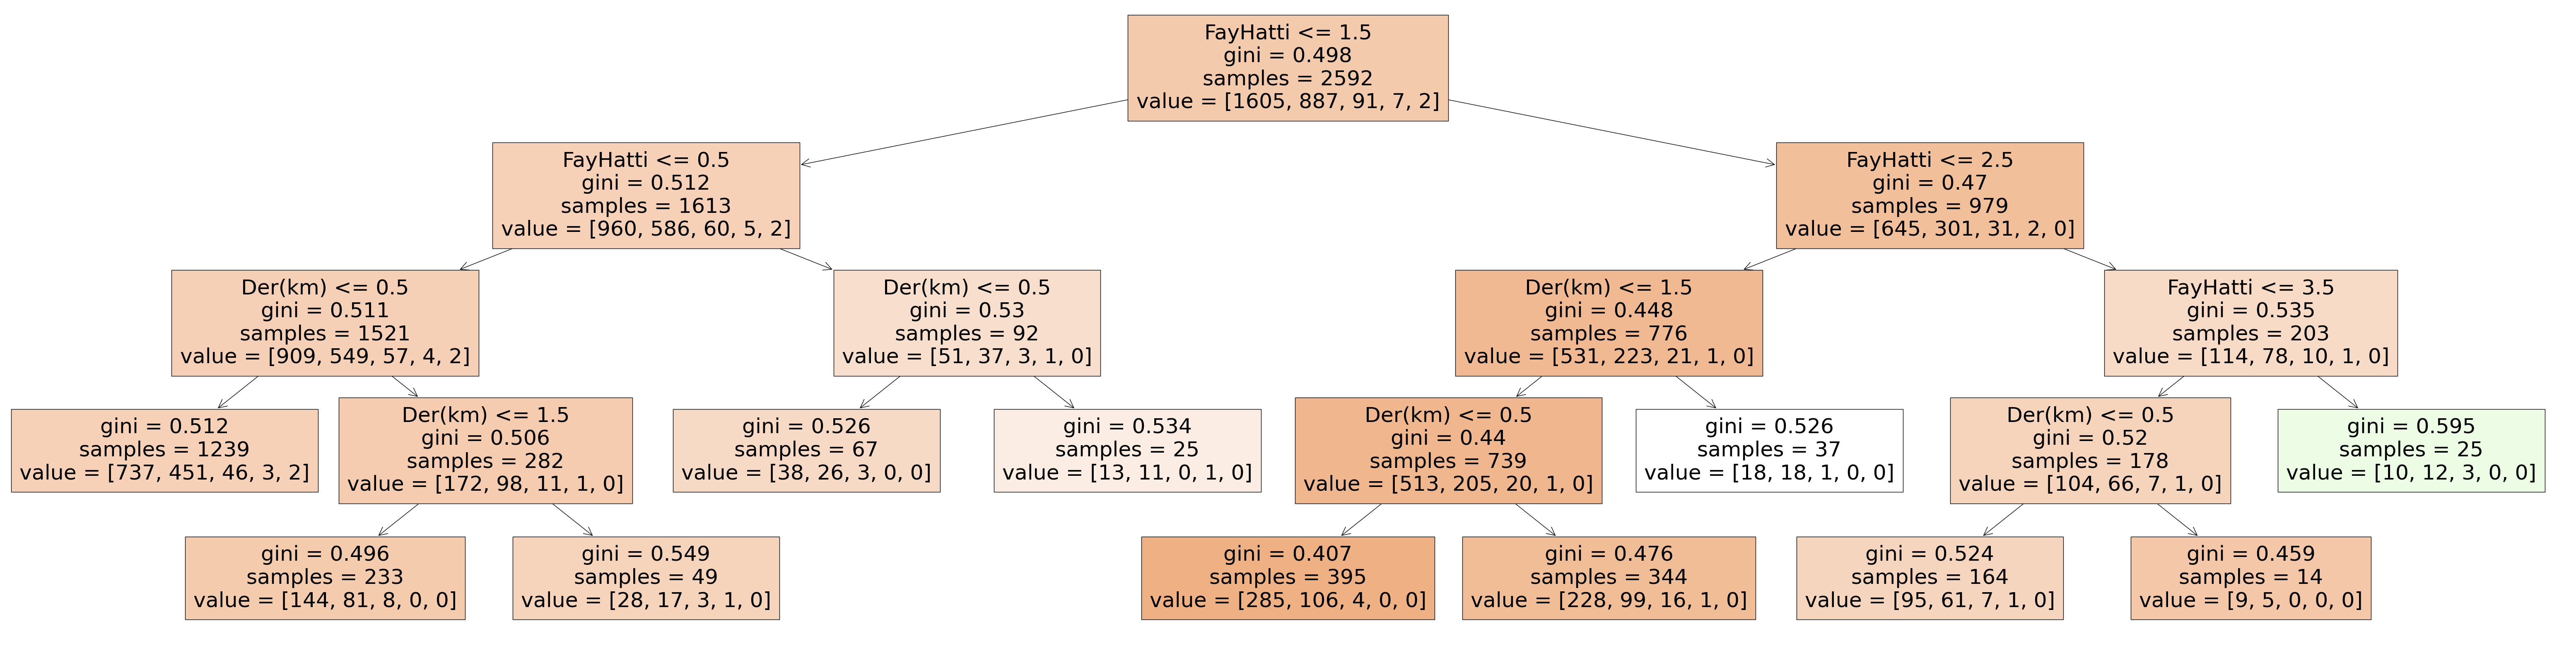

In [770]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model3, feature_names=randomTrainx.columns, max_depth=10, filled=True);

In [771]:
model3.tree_.max_depth

4

In [772]:
def kararAgaci(X_train , y_train , X_test,y_test,show=False):
    from sklearn.tree import DecisionTreeClassifier
    model3 = DecisionTreeClassifier(criterion= 'gini', max_depth=3, max_leaf_nodes=6)  # grid search cv ile parametre ...
    model3.fit(X_train , y_train)
    if show ==True:
        from sklearn.tree import plot_tree, export_text
        plt.figure(figsize =(80,20))
        plot_tree(model3, feature_names=X_train.columns, filled=True);
        predtrain = model3.predict(X_train)
        predtest = model3.predict(X_test)
        print('Accuracy Train:',accuracy_score(y_train,predtrain))
        print('Accuracy  Test:' ,accuracy_score(y_test,predtest))
        print(classification_report(y_train,predtrain))
        print(classification_report(y_test,predtest))
    else:
        return model3

Accuracy Train: 0.6853573503776874
Accuracy  Test: 0.5478395061728395
              precision    recall  f1-score   support

           0       0.62      0.84      0.72      4252
           1       0.00      0.00      0.00      1456
           2       0.00      0.00      0.00       335
           3       0.00      0.00      0.00        31
           4       0.77      0.82      0.79      4252

    accuracy                           0.69     10326
   macro avg       0.28      0.33      0.30     10326
weighted avg       0.57      0.69      0.62     10326

              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.55      2592
   macro avg       0.12      0.18      0.15      2592
weighte

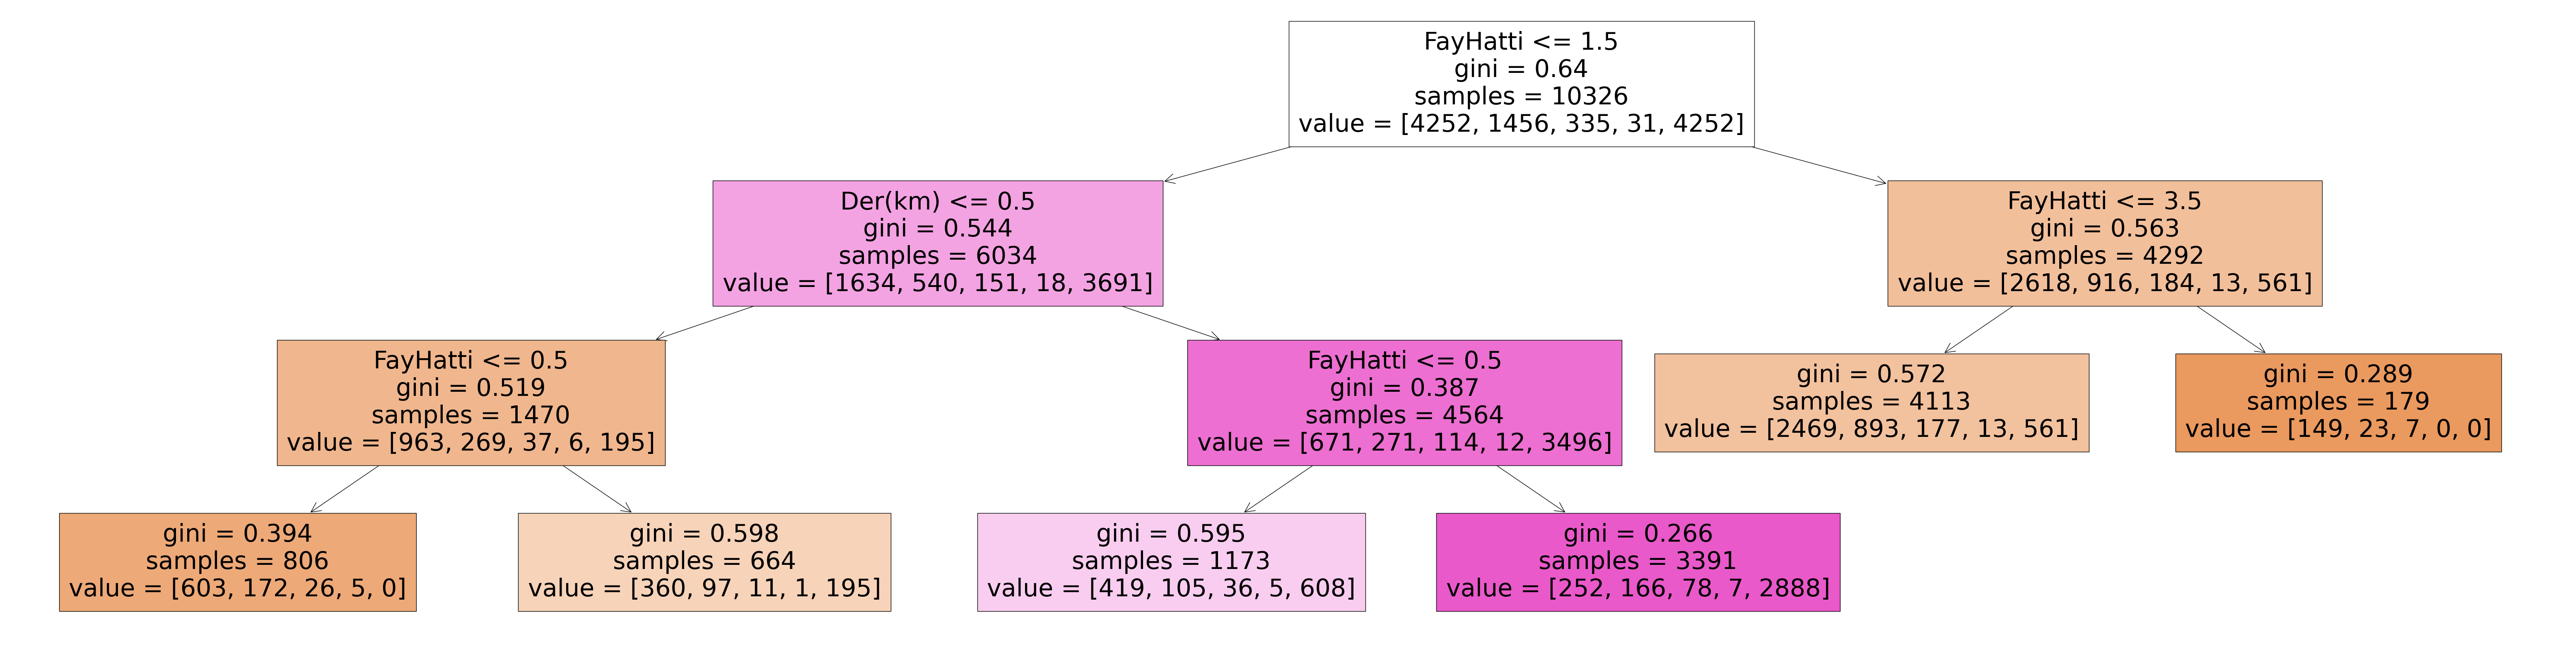

In [773]:
kararAgaci(minoritytrainx, minorityTrainy ,X_test, y_test, True) 

AUC for 1 is: 0.46744702727900894
AUC for 2 is: 0.46491952669481657
AUC for 3 is: 0.4111356728378005
AUC for 4 is: 0.39285714285714285
Best Threshold1=0.217116, G-Mean=0.446
Best Threshold2=0.217116, G-Mean=0.440
Best Threshold3=0.217116, G-Mean=0.425
Best Threshold4=0.213400, G-Mean=0.392


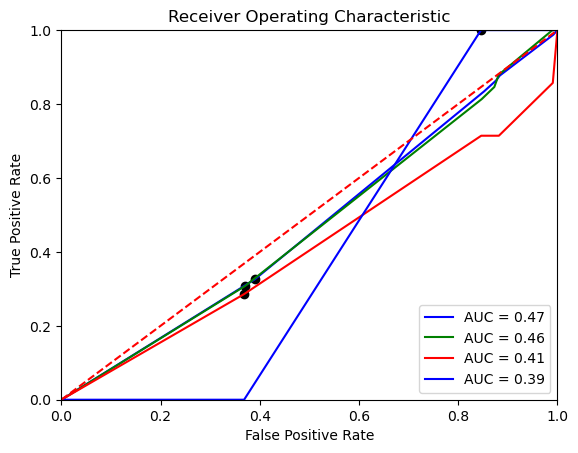

In [775]:
model= kararAgaci(minoritytrainx, minorityTrainy ,X_test, y_test, False)
myroccurve(model ,minoritytrainx, minorityTrainy ,X_test, y_test)

In [776]:
print("classification report when threshold is default (0.5)")
print(classification_report(y_test, model.predict(X_test)))
new_threshold=0.029812
print("classification report when threshold is changed to ",new_threshold)
y_pred = (model.predict_proba(X_test)[:,1] >= new_threshold).astype(bool) 
print(classification_report(y_test,y_pred))

classification report when threshold is default (0.5)
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.55      2592
   macro avg       0.12      0.18      0.15      2592
weighted avg       0.38      0.55      0.45      2592

classification report when threshold is changed to  0.029812
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1605
           1       0.34      1.00      0.51       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.34      2592
   macro avg    

### RANDOMFOREST

In [777]:
def myrandomforest(X_train , y_train , X_test,y_test,show=False):
    randomMOdel = RandomForestClassifier(criterion='gini' , max_depth=3, max_leaf_nodes=6)
    randomMOdel.fit(X_train, y_train)
    if show ==True:
        predtrain = randomMOdel.predict(X_train)
        predtest = randomMOdel.predict(X_test)
        print('Accuracy Train:',accuracy_score(y_train,predtrain))
        print('Accuracy  Test:' ,accuracy_score(y_test,predtest))
        print(classification_report(y_test, randomMOdel.predict(X_test)))
        print(classification_report(y_train,randomMOdel.predict(X_train)))

    else:
        return randomMOdel

In [778]:
myrandomforest(minoritytrainx, minorityTrainy,X_test, y_test, True)

Accuracy Train: 0.6853573503776874
Accuracy  Test: 0.5478395061728395
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.55      2592
   macro avg       0.12      0.18      0.15      2592
weighted avg       0.38      0.55      0.45      2592

              precision    recall  f1-score   support

           0       0.62      0.84      0.72      4252
           1       0.00      0.00      0.00      1456
           2       0.00      0.00      0.00       335
           3       0.00      0.00      0.00        31
           4       0.77      0.82      0.79      4252

    accuracy                           0.69     10326
   macro avg       0.28      0.33      0.30     10326
weighte

AUC for 1 is: 0.46399607229879614
AUC for 2 is: 0.460189550553405
AUC for 3 is: 0.41796076264161364
AUC for 4 is: 0.4075289575289575
Best Threshold1=0.214861, G-Mean=0.435
Best Threshold2=0.214861, G-Mean=0.437
Best Threshold3=0.214861, G-Mean=0.430
Best Threshold4=0.206920, G-Mean=0.411


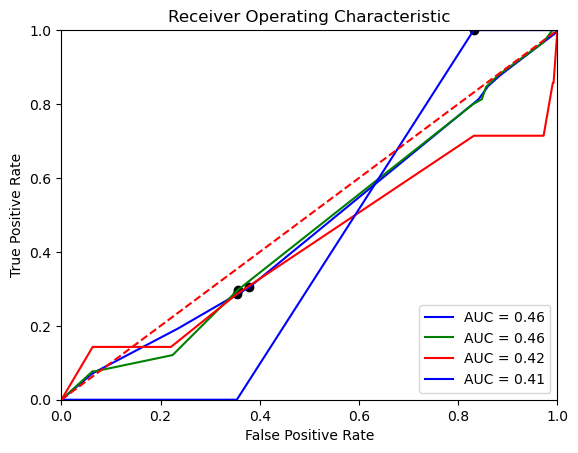

In [779]:
randommodel= myrandomforest(minoritytrainx, minorityTrainy ,X_test, y_test, False)
myroccurve(randommodel ,minoritytrainx, minorityTrainy ,X_test, y_test,)

In [780]:
print("classification report when threshold is default (0.5)")
print(classification_report(y_test, randommodel.predict(X_test)))
new_threshold =0.026613
print("classification report when threshold is changed to ",new_threshold)
y_pred = (randommodel.predict_proba(X_test)[:,1] >= new_threshold).astype(bool) 
print(classification_report(y_test,y_pred))

classification report when threshold is default (0.5)
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.55      2592
   macro avg       0.12      0.18      0.15      2592
weighted avg       0.38      0.55      0.45      2592

classification report when threshold is changed to  0.026613
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1605
           1       0.34      1.00      0.51       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.34      2592
   macro avg    

### XGBOOST

In [781]:
def myxgboost(X_train , y_train , X_test,y_test,show=False):
    xgbclass = xgboost.XGBClassifier(min_child_weight=5,max_depth=2,learning_rate=0.01,gamma=0.5)
    xgbclass.fit(X_train, y_train)
    if show ==True:
        predtrain = xgbclass.predict(X_train)
        predtest = xgbclass.predict(X_test)
        print('Accuracy Train:',accuracy_score(y_train,predtrain))
        print('Accuracy  Test:' ,accuracy_score(y_test,predtest))

        print(classification_report(y_test, xgbclass.predict(X_test)))
        print(classification_report(y_train,predtrain))

    else:
        return xgbclass

In [782]:
myxgboost(minoritytrainx, minorityTrainy,X_test, y_test, True)

Accuracy Train: 0.6853573503776874
Accuracy  Test: 0.5478395061728395
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.55      2592
   macro avg       0.12      0.18      0.15      2592
weighted avg       0.38      0.55      0.45      2592

              precision    recall  f1-score   support

           0       0.62      0.84      0.72      4252
           1       0.00      0.00      0.00      1456
           2       0.00      0.00      0.00       335
           3       0.00      0.00      0.00        31
           4       0.77      0.82      0.79      4252

    accuracy                           0.69     10326
   macro avg       0.28      0.33      0.30     10326
weighte

AUC for 1 is: 0.47466831092317513
AUC for 2 is: 0.49143419555254825
AUC for 3 is: 0.4286819563415307
AUC for 4 is: 0.3832046332046332
Best Threshold1=0.183893, G-Mean=0.452
Best Threshold2=0.183893, G-Mean=0.460
Best Threshold3=0.199140, G-Mean=0.478
Best Threshold4=0.180677, G-Mean=0.380


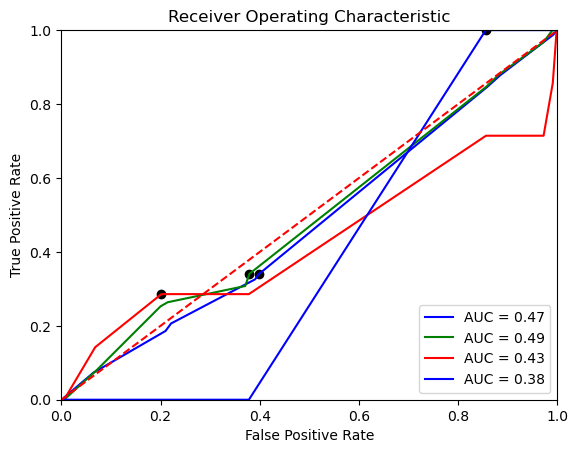

In [783]:
xgbclass= myxgboost(minoritytrainx, minorityTrainy ,X_test, y_test, False)
myroccurve(xgbclass ,minoritytrainx, minorityTrainy ,X_test, y_test,)

In [784]:
print("classification report when threshold is default (0.5)")
print(classification_report(y_test, xgbclass.predict(X_test)))
new_threshold = 0.122900
print("classification report when threshold is changed to ",new_threshold)
y_pred = (xgbclass.predict_proba(X_test)[:,1] >= new_threshold).astype(bool) 
print(classification_report(y_test,y_pred))

classification report when threshold is default (0.5)
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1605
           1       0.00      0.00      0.00       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.55      2592
   macro avg       0.12      0.18      0.15      2592
weighted avg       0.38      0.55      0.45      2592

classification report when threshold is changed to  0.1229
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1605
           1       0.34      1.00      0.51       887
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.34      2592
   macro avg      

### DİĞER SINIFLANDIRMA MODELLERİNİ DENEME

In [785]:
#models classification function

def class_model_fit(X_train , y_train , X_test , y_test):
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    logReg = LogisticRegression(random_state=2)
    logReg.fit(X_train , y_train )
    y_predict_log = logReg.predict(X_test)
    logReg =accuracy_score(y_test, y_predict_log)
    
    #SVM linear
    from sklearn.svm import SVC
    svc_lineer = SVC(kernel ="rbf" , random_state=2)
    svc_lineer.fit(X_train, y_train)
    y_predict_svmlin = svc_lineer.predict(X_test)
    svc_lineer =accuracy_score(y_test, y_predict_svmlin)
     
    #SVM rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel ="linear" , random_state=2)
    svc_rbf.fit(X_train, y_train)
    y_predict_svmrbf = svc_rbf.predict(X_test)
    svc_rbf =accuracy_score(y_test, y_predict_svmrbf)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier(n_neighbors = 5 , metric="euclidean" , p=2)
    knn.fit(X_train, y_train)
    y_predict_knn = knn.predict(X_test)
    knn =accuracy_score(y_test, y_predict_knn)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    y_predict_nb = gauss.predict(X_test)
    gauss =accuracy_score(y_test, y_predict_nb)
    
    print("[0]Logistic Reg. training accuracy" , logReg)
    print("[1]KNN training accuracy**********" , knn)
    print("[2]svc_linear training accuracy***" , svc_lineer)
    print("[3]svc rbf accuracy***************" , svc_rbf)
    print("[4]Gausian Naive training accuracy" , gauss)

    
    
    
    return y_predict_log , y_predict_svmlin , y_predict_svmrbf , y_predict_knn, y_predict_nb


In [786]:
y_predict_log , y_predict_svmlin , y_predict_svmrbf , y_predict_knn, y_predict_nb = class_model_fit(X_train,y_train,X_test,y_test)

[0]Logistic Reg. training accuracy 0.6192129629629629
[1]KNN training accuracy********** 0.6172839506172839
[2]svc_linear training accuracy*** 0.6192129629629629
[3]svc rbf accuracy*************** 0.6192129629629629
[4]Gausian Naive training accuracy 0.6192129629629629


## DEEP LEARNING NN

In [798]:
import numpy as np
import tensorflow as tf

# import keras libraries
import keras
from keras.models import load_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.metrics import binary_accuracy
from keras.utils import to_categorical

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [799]:
X_train.shape

(6084, 2)

In [800]:
model = Sequential()
model.add(Flatten(input_shape= (2, ) )) 
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu')) 
model.add(Dense(1, activation = 'softmax')) 

model.build()
model.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
 dense_15 (Dense)            (None, 32)                96        
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [801]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

Epoch 1/100
191/191 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 2/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 3/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 4/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 5/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 6/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 7/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accura

Epoch 55/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 56/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 57/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 58/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 59/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 60/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2393 - val_loss: 0.0000e+00 - val_accuracy: 0.3422
Epoch 61/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0000e+00 -

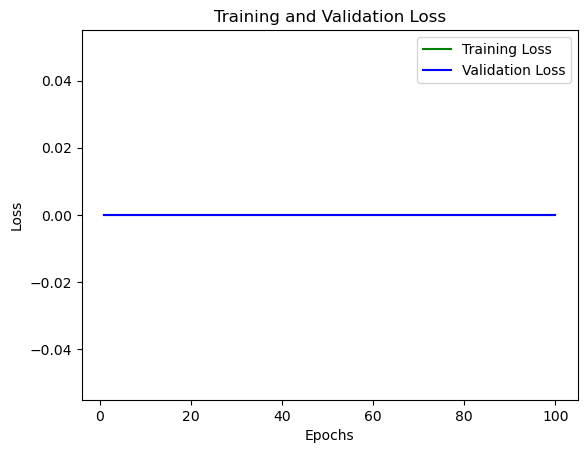

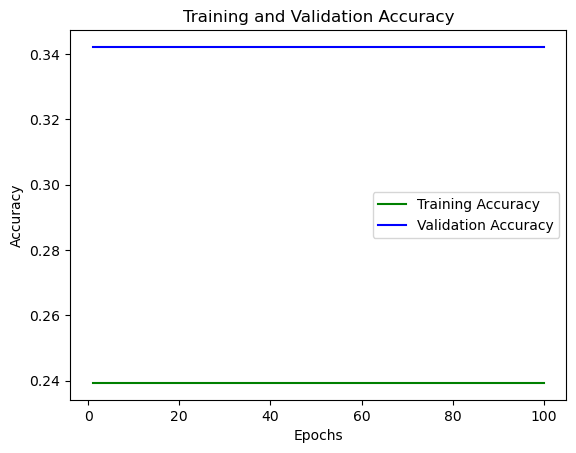

In [804]:
# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Eğitim ve doğrulama kayıp/accuracy değerlerini görselleştirme
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [564]:
kayipverisi = pd.DataFrame(model.history.history)

<Axes: >

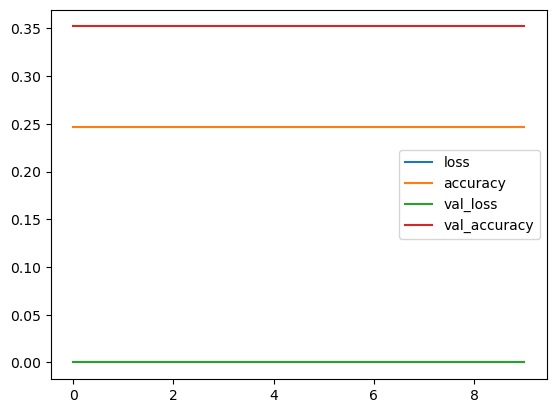

In [318]:
kayipverisi.plot()

In [319]:
pred = model.predict(X_test)

60/60 [==============================] - 0s 868us/step


In [320]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1146
           1       0.35      1.00      0.52       665
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.35      1889
   macro avg       0.07      0.20      0.10      1889
weighted avg       0.12      0.35      0.18      1889



In [321]:
def adapt_learning_rate(epoch, learning_rate):
    if epoch < 30:
        return learning_rate
    else:
        return 0.995 * learning_rate
my_lr_scheduler = tf.keras.callbacks.LearningRateScheduler(adapt_learning_rate)

myOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=myOptimizer,loss="binary_crossentropy", metrics="accuracy")

round(model.optimizer.lr.numpy(), 5)

0.01

In [322]:
early_stopping_monitor = EarlyStopping(patience=3)

In [323]:
fit2 = model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          #callbacks = [early_stopping_monitor],
          batch_size=100,
          shuffle = True,
          callbacks=[my_lr_scheduler],
          epochs=300)

Epoch 1/300
68/68 [==============================] - 1s 4ms/step - loss: 375952.4375 - accuracy: 0.2472 - val_loss: 207319.3750 - val_accuracy: 0.3520 - lr: 0.0100
Epoch 2/300
68/68 [==============================] - 0s 2ms/step - loss: 248818.4375 - accuracy: 0.2472 - val_loss: 139298.4531 - val_accuracy: 0.3520 - lr: 0.0100
Epoch 3/300
68/68 [==============================] - 0s 2ms/step - loss: 168873.8125 - accuracy: 0.2472 - val_loss: 95668.8516 - val_accuracy: 0.3520 - lr: 0.0100
Epoch 4/300
68/68 [==============================] - 0s 2ms/step - loss: 117474.3281 - accuracy: 0.2472 - val_loss: 67663.3828 - val_accuracy: 0.3520 - lr: 0.0100
Epoch 5/300
68/68 [==============================] - 0s 2ms/step - loss: 83807.8047 - accuracy: 0.2472 - val_loss: 48778.1602 - val_accuracy: 0.3520 - lr: 0.0100
Epoch 6/300
68/68 [==============================] - 0s 2ms/step - loss: 61007.8281 - accuracy: 0.2472 - val_loss: 36063.1289 - val_accuracy: 0.3520 - lr: 0.0100
Epoch 7/300
68/68 [===

Epoch 53/300
68/68 [==============================] - 0s 2ms/step - loss: 1.5239 - accuracy: 0.2472 - val_loss: 1.2403 - val_accuracy: 0.3520 - lr: 0.0089
Epoch 54/300
68/68 [==============================] - 0s 2ms/step - loss: 1.1430 - accuracy: 0.2472 - val_loss: 1.2924 - val_accuracy: 0.3520 - lr: 0.0089
Epoch 55/300
68/68 [==============================] - 0s 2ms/step - loss: 1.2188 - accuracy: 0.2472 - val_loss: 1.1552 - val_accuracy: 0.3520 - lr: 0.0088
Epoch 56/300
68/68 [==============================] - 0s 2ms/step - loss: 1.3175 - accuracy: 0.2472 - val_loss: 2.4101 - val_accuracy: 0.3520 - lr: 0.0088
Epoch 57/300
68/68 [==============================] - 0s 2ms/step - loss: 1.6068 - accuracy: 0.2472 - val_loss: 1.2621 - val_accuracy: 0.3520 - lr: 0.0087
Epoch 58/300
68/68 [==============================] - 0s 2ms/step - loss: 2.3168 - accuracy: 0.2472 - val_loss: 1.4333 - val_accuracy: 0.3520 - lr: 0.0087
Epoch 59/300
68/68 [==============================] - 0s 2ms/step - lo

Epoch 106/300
68/68 [==============================] - 0s 2ms/step - loss: 1.8573 - accuracy: 0.2472 - val_loss: 1.0612 - val_accuracy: 0.3520 - lr: 0.0068
Epoch 107/300
68/68 [==============================] - 0s 3ms/step - loss: 2.6424 - accuracy: 0.2472 - val_loss: 1.6662 - val_accuracy: 0.3520 - lr: 0.0068
Epoch 108/300
68/68 [==============================] - 0s 2ms/step - loss: 1.3624 - accuracy: 0.2472 - val_loss: 0.8049 - val_accuracy: 0.3520 - lr: 0.0068
Epoch 109/300
68/68 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.2472 - val_loss: 0.7300 - val_accuracy: 0.3520 - lr: 0.0067
Epoch 110/300
68/68 [==============================] - 0s 2ms/step - loss: 1.1632 - accuracy: 0.2472 - val_loss: 0.8017 - val_accuracy: 0.3520 - lr: 0.0067
Epoch 111/300
68/68 [==============================] - 0s 2ms/step - loss: 1.1198 - accuracy: 0.2472 - val_loss: 0.8455 - val_accuracy: 0.3520 - lr: 0.0067
Epoch 112/300
68/68 [==============================] - 0s 2ms/st

68/68 [==============================] - 0s 2ms/step - loss: 1.2577 - accuracy: 0.2472 - val_loss: 0.9068 - val_accuracy: 0.3520 - lr: 0.0053
Epoch 159/300
68/68 [==============================] - 0s 2ms/step - loss: 1.1889 - accuracy: 0.2472 - val_loss: 1.8449 - val_accuracy: 0.3520 - lr: 0.0052
Epoch 160/300
68/68 [==============================] - 0s 2ms/step - loss: 1.8639 - accuracy: 0.2472 - val_loss: 1.2897 - val_accuracy: 0.3520 - lr: 0.0052
Epoch 161/300
68/68 [==============================] - 0s 2ms/step - loss: 1.0657 - accuracy: 0.2472 - val_loss: 0.8216 - val_accuracy: 0.3520 - lr: 0.0052
Epoch 162/300
68/68 [==============================] - 0s 2ms/step - loss: 1.3724 - accuracy: 0.2472 - val_loss: 1.1003 - val_accuracy: 0.3520 - lr: 0.0052
Epoch 163/300
68/68 [==============================] - 0s 2ms/step - loss: 1.1127 - accuracy: 0.2472 - val_loss: 0.9570 - val_accuracy: 0.3520 - lr: 0.0051
Epoch 164/300
68/68 [==============================] - 0s 2ms/step - loss: 0.8

68/68 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.2472 - val_loss: 1.0197 - val_accuracy: 0.3520 - lr: 0.0041
Epoch 211/300
68/68 [==============================] - 0s 2ms/step - loss: 1.0539 - accuracy: 0.2472 - val_loss: 0.8586 - val_accuracy: 0.3520 - lr: 0.0040
Epoch 212/300
68/68 [==============================] - 0s 2ms/step - loss: 0.8770 - accuracy: 0.2472 - val_loss: 0.7202 - val_accuracy: 0.3520 - lr: 0.0040
Epoch 213/300
68/68 [==============================] - 0s 2ms/step - loss: 0.9499 - accuracy: 0.2472 - val_loss: 0.7894 - val_accuracy: 0.3520 - lr: 0.0040
Epoch 214/300
68/68 [==============================] - 0s 2ms/step - loss: 0.9154 - accuracy: 0.2472 - val_loss: 0.7233 - val_accuracy: 0.3520 - lr: 0.0040
Epoch 215/300
68/68 [==============================] - 0s 2ms/step - loss: 0.7531 - accuracy: 0.2472 - val_loss: 0.7371 - val_accuracy: 0.3520 - lr: 0.0040
Epoch 216/300
68/68 [==============================] - 0s 2ms/step - loss: 0.7

68/68 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.2472 - val_loss: 0.7226 - val_accuracy: 0.3520 - lr: 0.0031
Epoch 263/300
68/68 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.2472 - val_loss: 0.7255 - val_accuracy: 0.3520 - lr: 0.0031
Epoch 264/300
68/68 [==============================] - 0s 2ms/step - loss: 0.7509 - accuracy: 0.2472 - val_loss: 0.7169 - val_accuracy: 0.3520 - lr: 0.0031
Epoch 265/300
68/68 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.2472 - val_loss: 0.7158 - val_accuracy: 0.3520 - lr: 0.0031
Epoch 266/300
68/68 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.2472 - val_loss: 0.8021 - val_accuracy: 0.3520 - lr: 0.0031
Epoch 267/300
68/68 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.2472 - val_loss: 0.7926 - val_accuracy: 0.3520 - lr: 0.0030
Epoch 268/300
68/68 [==============================] - 0s 2ms/step - loss: 0.6

In [805]:
kayipverisi = pd.DataFrame(model.history.history)

<Axes: >

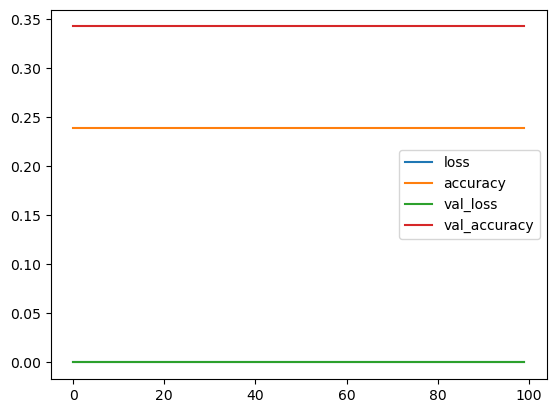

In [806]:
kayipverisi.plot()

In [326]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1146
           1       0.35      1.00      0.52       665
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.35      1889
   macro avg       0.07      0.20      0.10      1889
weighted avg       0.12      0.35      0.18      1889



### YAPILACAKLAR
* TARGET SINIFTAKİ DEĞERLERİ DÜŞÜR. /0
* NEURAL NETWORK AĞI KUR : callbacks , dropout , loss ile ilgilen.